In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [3]:
data = pd.read_csv("data_2000.txt")
data.head()

,year,global mean SC,2s.d. error range,"smoothed global mean SC, by LOWESS with span width of 240 month"
0,1940.000,-0.01381,0.00975,-0.01260
1,1940.083,-0.01322,0.00965,-0.01257
2,1940.167,-0.01360,0.00953,-0.01255
3,1940.250,-0.01407,0.00938,-0.01252
4,1940.333,-0.01439,0.00937,-0.01250


In [4]:
cols_0 = data.columns
cols_1 = ["year", "mean", "2std", "mean_240"]
data = data.rename(columns=dict(zip(cols_0, cols_1)))
data.head()

,year,mean,2std,mean_240
0,1940.000,-0.01381,0.00975,-0.01260
1,1940.083,-0.01322,0.00965,-0.01257
2,1940.167,-0.01360,0.00953,-0.01255
3,1940.250,-0.01407,0.00938,-0.01252
4,1940.333,-0.01439,0.00937,-0.01250


In [5]:
data["+2s"] = data["mean"] + data["2std"]
data["-2s"] = data["mean"] - data["2std"]
data.head()

,year,mean,2std,mean_240,+2s,-2s
0,1940.000,-0.01381,0.00975,-0.01260,-0.00406,-0.02356
1,1940.083,-0.01322,0.00965,-0.01257,-0.00357,-0.02287
2,1940.167,-0.01360,0.00953,-0.01255,-0.00407,-0.02313
3,1940.250,-0.01407,0.00938,-0.01252,-0.00469,-0.02345
4,1940.333,-0.01439,0.00937,-0.01250,-0.00502,-0.02376


In [6]:
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator

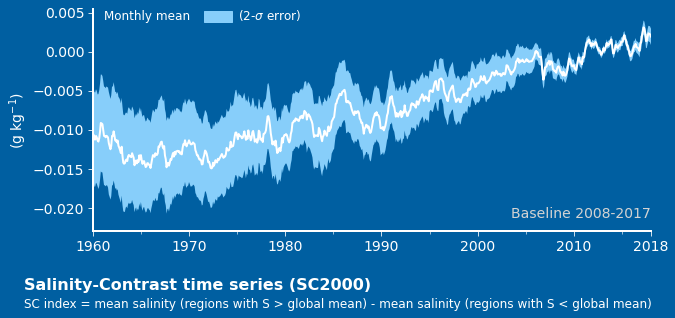

In [22]:
fig, axs = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={"height_ratios":[9,1]})
fig.set_facecolor("#005FA1")
axs[0].set_facecolor("#005FA1")
axs[0].fill_between(data["year"], data["+2s"], data["-2s"], fc="lightskyblue")
axs[0].plot(data["year"], data["mean"], c="w", lw=2)
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_linewidth(2)
axs[0].spines["left"].set_color("w")
axs[0].spines["bottom"].set_linewidth(2)
axs[0].spines["bottom"].set_color("w")


axs[0].set_xticks([1960, 1970, 1980, 1990, 2000, 2010, 2018])
axs[0].xaxis.set_minor_locator(MultipleLocator(5))
axs[0].tick_params(axis="both", which="major", length=5, color="w", labelsize=14, labelcolor="w")
axs[0].tick_params(which='minor', length=3, color='w')
axs[0].set_ylabel("(g kg$^{-1}$)", fontdict={"fontsize":14, "color":"w"})
axs[0].set_xlim(1960, 2018)
axs[0].set_ylim(-0.023, )

Rectangle = patches.Rectangle((0.2, 0.94), 0.05, 0.05, color="lightskyblue", transform=axs[0].transAxes)
axs[0].text(0.02, 0.95, "Monthly mean", fontdict={"fontsize":12, "color":"w"}, transform=axs[0].transAxes)
axs[0].add_patch(Rectangle)
axs[0].text(0.26, 0.95, "(2-$\sigma$ error)", fontdict={"fontsize":12, "color":"w"}, transform=axs[0].transAxes)
axs[0].text(1, 0.06, "Baseline 2008-2017", ha="right", transform=axs[0].transAxes, fontdict={"fontsize":14, "color":"lightgray"})

axs[1].axis("off")
fig.text(0.03, 0.1, "Salinity-Contrast time series (SC2000)", fontdict={"fontsize":16, "fontweight":"bold", "color":"w"})
fig.text(0.03, 0.05, "SC index = mean salinity (regions with S > global mean) - mean salinity (regions with S < global mean)", fontdict={"fontsize":12, "color":"w"})

fig.savefig("42_ci_2.png")

In [17]:
from copy import deepcopy

data_ = deepcopy(data)
data_.head()

,year,mean,2std,mean_240,+2s,-2s
0,1940.000,-0.01381,0.00975,-0.01260,-0.00406,-0.02356
1,1940.083,-0.01322,0.00965,-0.01257,-0.00357,-0.02287
2,1940.167,-0.01360,0.00953,-0.01255,-0.00407,-0.02313
3,1940.250,-0.01407,0.00938,-0.01252,-0.00469,-0.02345
4,1940.333,-0.01439,0.00937,-0.01250,-0.00502,-0.02376


In [18]:
def random(loc, scale, size=100):
    return np.random.normal(loc=loc, scale=scale, size=[size]*loc.size)

data_["generated"] = data_.apply(lambda x: random(x["mean"], x["2std"], 1000), axis=1)
data1 = data_.explode("generated")
data1["generated"] = data1["generated"].astype("float")

data1.head()

,year,mean,2std,mean_240,+2s,-2s,generated
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.026161
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.015017
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.003001
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.006052
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.013604


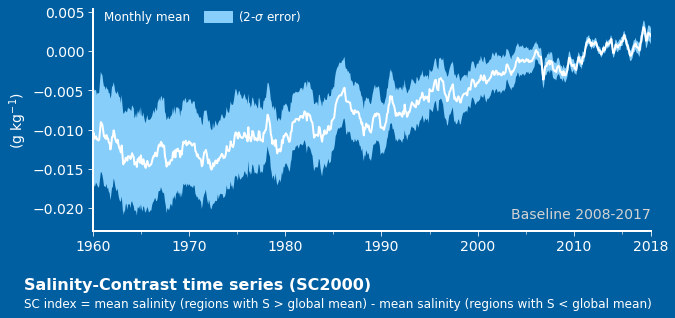

In [23]:
fig, axs = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={"height_ratios":[9,1]})
fig.set_facecolor("#005FA1")
axs[0].set_facecolor("#005FA1")

g = sns.lineplot(x="year", y="generated", data=data1, ci="sd", ax=axs[0], err_kws={"fc":"lightskyblue", "ec":"none", "alpha":1}, color="w", lw=2)
# axs[0].fill_between(data["year"], data["+2s"], data["-2s"], fc="lightskyblue")
# axs[0].plot(data["year"], data["mean"], c="w", lw=2)

axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["left"].set_linewidth(2)
axs[0].spines["left"].set_color("w")
axs[0].spines["bottom"].set_linewidth(2)
axs[0].spines["bottom"].set_color("w")

axs[0].set_xticks([1960, 1970, 1980, 1990, 2000, 2010, 2018])
axs[0].xaxis.set_minor_locator(MultipleLocator(5))
axs[0].tick_params(axis="both", which="major", length=5, color="w", labelsize=14, labelcolor="w")
axs[0].tick_params(which='minor', length=3, color='w')
axs[0].set_xlabel("")
axs[0].set_ylabel("(g kg$^{-1}$)", fontdict={"fontsize":14, "color":"w"})
axs[0].set_xlim(1960, 2018)
axs[0].set_ylim(-0.023, )

Rectangle = patches.Rectangle((0.2, 0.94), 0.05, 0.05, color="lightskyblue", transform=axs[0].transAxes)
axs[0].text(0.02, 0.95, "Monthly mean", fontdict={"fontsize":12, "color":"w"}, transform=axs[0].transAxes)
axs[0].add_patch(Rectangle)
axs[0].text(0.26, 0.95, "(2-$\sigma$ error)", fontdict={"fontsize":12, "color":"w"}, transform=axs[0].transAxes)
axs[0].text(1, 0.06, "Baseline 2008-2017", ha="right", transform=axs[0].transAxes, fontdict={"fontsize":14, "color":"lightgray"})

axs[1].axis("off")
fig.text(0.03, 0.1, "Salinity-Contrast time series (SC2000)", fontdict={"fontsize":16, "fontweight":"bold", "color":"w"})
fig.text(0.03, 0.05, "SC index = mean salinity (regions with S > global mean) - mean salinity (regions with S < global mean)", fontdict={"fontsize":12, "color":"w"})

fig.savefig("42_ci_3.png")

# random test

In [28]:
df_test = pd.DataFrame({"X":np.concatenate([[i]*100 for i in range(21)]), "Y":np.random.normal(size=2100)})
df_test.head()

,X,Y
0,0,0.336784
1,0,1.392053
2,0,0.092672
3,0,0.924143
4,0,-0.663584


In [29]:
df_gX_mean = df_test.groupby("X").mean().reset_index()
df_gX_std = df_test.groupby("X").std().reset_index()
df_gX = df_gX_mean.merge(df_gX_std, left_on="X", right_on="X", suffixes=("_mean", "_std"))
df_gX.head()

,X,Y_mean,Y_std
0,0,0.002867,1.007797
1,1,0.045711,0.895527
2,2,0.036701,1.137081
3,3,-0.086662,0.982032
4,4,0.042389,1.106587


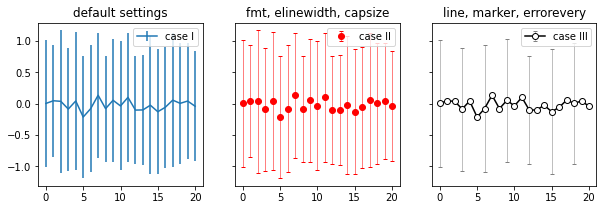

In [30]:
fig, axs = plt.subplots(ncols=3, figsize=(10,3), sharex=True, sharey=True)

axs[0].errorbar(x=df_gX["X"], y=df_gX["Y_mean"], yerr=df_gX["Y_std"], label="case I")
axs[0].set_title("default settings")
axs[0].legend()

axs[1].errorbar(x=df_gX["X"], y=df_gX["Y_mean"], yerr=df_gX["Y_std"], 
                fmt="ro", elinewidth=0.5, capsize=2, label="case II")
axs[1].set_title("fmt, elinewidth, capsize")
axs[1].legend(loc="upper right")

axs[2].errorbar(x=df_gX["X"], y=df_gX["Y_mean"], yerr=df_gX["Y_std"], 
                ls="-", c="k", marker="o", mec="k", mfc="w", elinewidth=0.5, capsize=2,
                ecolor="gray", errorevery=3, label="case III")
axs[2].set_title("line, marker, errorevery")
axs[2].legend(loc="upper right")
fig.savefig("42_ci_5.png")

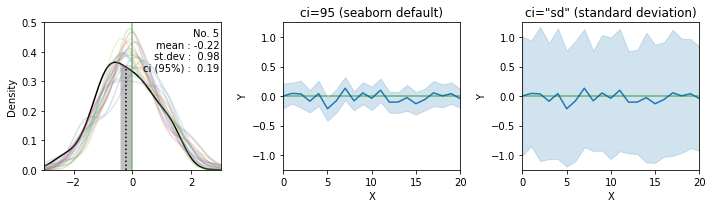

In [35]:
cis = [95, "sd"]
font_title = {"fontsize":12}
titles = ["ci=95 (seaborn default)", "ci=\"sd\" (standard deviation)"]

fig, axs = plt.subplots(ncols=3, figsize=(10,3))

for ax, ci, title in zip(axs[1:], cis, titles[:2]):
    sns.lineplot(x="X", y="Y", data=df_test, ci=ci, ax=ax)
    ax.set_title(title, fontdict=font_title)
    ax.axhline(0, c="green", alpha=0.5)
    ax.set_xlim(0,20)
    ax.set_ylim(-1.25, 1.25)
    
for i in range(21):
    if i == 5:
        color = "k"
        alpha = 1

    else:
        color = f"C{i}"
        alpha = 0.2
        
    df_test.loc[100*i:100*(i+1), "Y"].plot.kde(ax=axs[0], c=color, legend=False, alpha=alpha, zorder=2)
    axs[0].set_xlim(-3,3)
    axs[0].set_ylim(0, 0.5)
    
    if i == 5:
        axs[0].axvline(0, c="green", alpha=0.5, zorder=3)
        std = df_test.loc[100*i:100*(i+1), "Y"].std()
        ci95 = 1.96 * std/np.sqrt(100)
        mean = df_test.loc[100*i:100*(i+1), "Y"].mean()
        line_mean = axs[0].plot([mean, mean], [0, 0.35], ":", c="k", label="no.7 mean", zorder=2.5)
        
        # Line plot에서 데이터 가져오기
        X_, Y_ = axs[0].get_lines()[i].get_data(orig=True)
        axs[0].fill_between(X_[(X_ >= mean-ci95) & (X_ < mean+ci95)], Y_[(X_ >= mean-ci95) & (X_ < mean+ci95)], fc="gray", alpha=0.5, zorder=2.4)
        
        fig.text(0.31, 0.65, f"No. {i}\nmean : {mean:0.2f}\nst.dev :  {std:0.2f}\nci (95%) :  {ci95:0.2f}", fontdict={"fontsize":10, "color":"k"}, ha="right") #, transform=ax.transAxes)

fig.tight_layout()
fig.savefig("42_ci_4.png")

In [376]:
X, Y = axs[0].get_lines()[16].get_data(orig=True)

In [387]:
Y[(X >= mean-ci95) & (X < mean+ci95)]

array([0.35395748, 0.35472897, 0.35546742, 0.35617222, 0.3568428 ,
       0.35747863, 0.35807925, 0.35864421, 0.35917314, 0.3596657 ,
       0.36012159, 0.36054058, 0.36092248, 0.36126714, 0.36157446,
       0.3618444 , 0.36207695, 0.36227217, 0.36243015, 0.36255103,
       0.36263499, 0.36268226, 0.36269312, 0.36266788, 0.3626069 ,
       0.36251057, 0.36237932, 0.36221363, 0.362014  , 0.36178097,
       0.3615151 , 0.36121699, 0.36088727, 0.36052659, 0.36013561,
       0.35971504, 0.35926559, 0.35878799, 0.35828298, 0.35775133,
       0.35719379, 0.35661115, 0.35600419, 0.35537369, 0.35472044,
       0.35404523, 0.35334884, 0.35263204])

In [378]:
len(X)

1000

In [361]:
ci95

0.19874825159344123

In [360]:
mean

-0.3057748942687191

In [366]:
np.arange(mean-ci95, mean+ci95, 0.01)

array([-0.50452315, -0.49452315, -0.48452315, -0.47452315, -0.46452315,
       -0.45452315, -0.44452315, -0.43452315, -0.42452315, -0.41452315,
       -0.40452315, -0.39452315, -0.38452315, -0.37452315, -0.36452315,
       -0.35452315, -0.34452315, -0.33452315, -0.32452315, -0.31452315,
       -0.30452315, -0.29452315, -0.28452315, -0.27452315, -0.26452315,
       -0.25452315, -0.24452315, -0.23452315, -0.22452315, -0.21452315,
       -0.20452315, -0.19452315, -0.18452315, -0.17452315, -0.16452315,
       -0.15452315, -0.14452315, -0.13452315, -0.12452315, -0.11452315])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='X', ylabel='Y'>

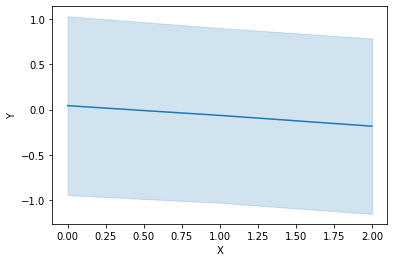

In [295]:
sns.lineplot("X", "Y", data=df_test, ci="sd")

<AxesSubplot:>

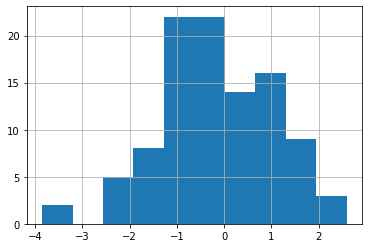

In [270]:
df_test.loc[:100, "Y"].hist()

In [274]:
np.std(df_test.loc[:100, "Y"]) * 1.96 / 10

0.23915075192191937

In [36]:
data1.head()

,year,mean,2std,mean_240,+2s,-2s,generated
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.026161
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.015017
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.003001
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.006052
0,1940.0,-0.01381,0.00975,-0.0126,-0.00406,-0.02356,-0.013604
